In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

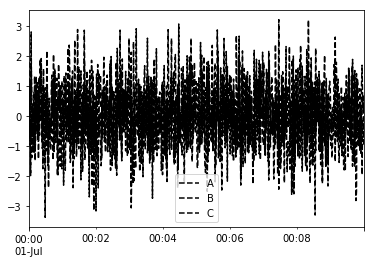

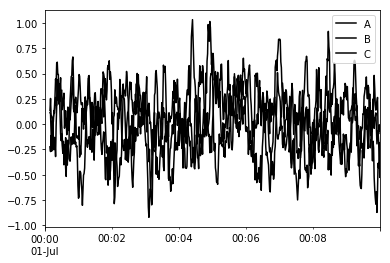

In [5]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [6]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

/home/rlrognstad/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,-0.087305,-0.264222,0.450326
2016-07-01 00:00:02,0.344066,0.036553,0.652279
2016-07-01 00:00:03,-0.362547,0.286906,0.198960
2016-07-01 00:00:04,0.182238,0.934824,0.111428
2016-07-01 00:00:05,0.343702,0.406462,-0.059680
2016-07-01 00:00:06,0.132799,0.403013,-0.140193
2016-07-01 00:00:07,-0.001554,0.293123,-0.335845
2016-07-01 00:00:08,0.028813,0.271531,-0.385638
2016-07-01 00:00:09,0.158115,0.011639,-0.393603


In [7]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [8]:
df.head()

,A,B,C,D
2016-06-06,-0.645493,0.489374,-0.622861,0.016048
2016-06-07,-0.688170,-0.896637,-0.762256,1.029480
2016-06-08,0.252576,0.501667,-1.686384,-0.551713
2016-06-09,1.227742,0.275688,-0.866273,0.079178
2016-06-10,1.087276,-0.407990,-0.926622,-0.744007


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6756230f0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fe6771dd550>], dtype=object)

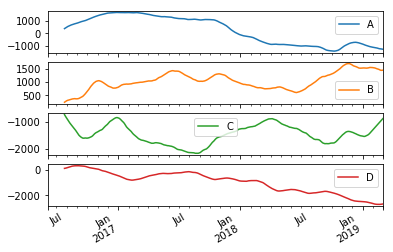

In [9]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [10]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.979058,0.701393,2.409896,0.513582


In [11]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-0.989578,0.041056,-1.003989,0.530788
2016-06-08,-1.020081,0.058839,-1.693160,0.518463
2016-06-09,-0.728397,0.136652,-2.254313,0.532096
2016-06-10,-0.335931,0.101742,-2.776330,0.391474


In [ ]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic?

#exanding seems like it would be more stable because it uses more data

# When might one vs. the other be appropriate?

In [12]:
# EWMA
# Why use EWMA?

#EWMA is eponenetial smoothing of a time series, is can be use to detect analomlies 


In [ ]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [ ]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting